In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-global-forecasting-week-1/train.csv
/kaggle/input/covid19-global-forecasting-week-1/submission.csv
/kaggle/input/covid19-global-forecasting-week-1/test.csv


In [2]:
train=pd.read_csv("/kaggle/input/covid19-global-forecasting-week-1/train.csv")
test=pd.read_csv("/kaggle/input/covid19-global-forecasting-week-1/test.csv")
submission=pd.read_csv("/kaggle/input/covid19-global-forecasting-week-1/submission.csv")

In [3]:
X_test1=test[['ForecastId']]+16188

In [4]:
X1=train[['Id']]
y_con=train[['ConfirmedCases']]
y_fat=train[['Fatalities']]

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(2)
X=poly.fit_transform(X1)
X_test=poly.fit_transform(X_test1)

In [6]:
from sklearn.linear_model import Ridge, Lasso, SGDRegressor
model_con=Lasso()
model_con.fit(X, y_con);

In [7]:
y_pred_con=model_con.predict(X_test)
y_pred_con

array([ 335.02930229,  334.99573698,  334.96216838, ..., -319.99863357,
       -320.07237402, -320.14611776])

In [8]:
model_fat=Lasso()
model_fat.fit(X, y_fat)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [9]:
y_pred_fat=model_fat.predict(X_test)
y_pred_fat

array([ 13.75032438,  13.74896344,  13.74760232, ..., -15.86711035,
       -15.87060131, -15.87409245])

In [10]:
y_pred_con1=y_pred_con.ravel()
y_pred_fat1=y_pred_fat.ravel()

In [11]:
data={'ForecastId':submission.ForecastId,'ConfirmedCases':y_pred_con1, 'Fatalities':y_pred_fat1}
result=pd.DataFrame(data, index=submission.index)
result.to_csv('/kaggle/working/submission.csv', index=False)
m1=pd.read_csv('/kaggle/working/submission.csv')
m1.head()

,ForecastId,ConfirmedCases,Fatalities
0,1,335.029302,13.750324
1,2,334.995737,13.748963
2,3,334.962168,13.747602
3,4,334.928596,13.746241
4,5,334.895021,13.744880


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

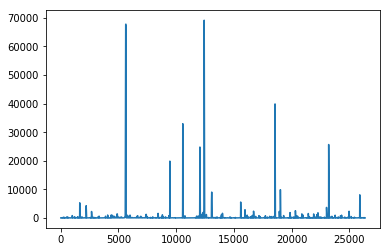

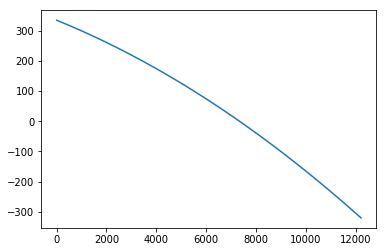

In [13]:
hor=train['Id']
ver=train['ConfirmedCases']
plt.plot(hor, ver)
plt.show()
hor=m1['ForecastId']
ver=m1['ConfirmedCases']
plt.plot(hor, ver)
plt.show()

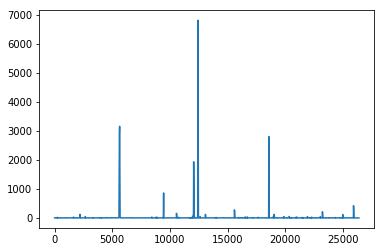

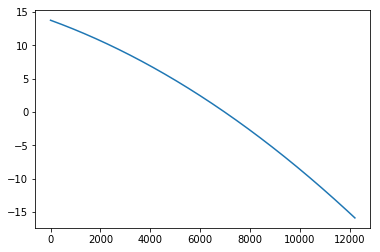

In [14]:
hor=train['Id']
ver=train['Fatalities']
plt.plot(hor, ver)
plt.show()
hor=m1['ForecastId']
ver=m1['Fatalities']
plt.plot(hor, ver)
plt.show()

In [15]:
train['Country/Region'].value_counts()

US            3654
China         2079
Canada         693
Australia      567
France         504
              ... 
Sri Lanka       63
Guadeloupe      63
Mauritania      63
Namibia         63
Seychelles      63
Name: Country/Region, Length: 163, dtype: int64

In [16]:
train.tail()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
17887,26378,NaN,Zambia,-15.4167,28.2833,2020-03-20,2.0,0.0
17888,26379,NaN,Zambia,-15.4167,28.2833,2020-03-21,2.0,0.0
17889,26380,NaN,Zambia,-15.4167,28.2833,2020-03-22,3.0,0.0
17890,26381,NaN,Zambia,-15.4167,28.2833,2020-03-23,3.0,0.0
17891,26382,NaN,Zambia,-15.4167,28.2833,2020-03-24,3.0,0.0


In [17]:
top_risk=train[train.Date=='2020-03-18'].groupby('Country/Region').sum().sort_values(by='ConfirmedCases',ascending=False).head(10)
top_risk


,Id,Lat,Long,ConfirmedCases,Fatalities
Country/Region,,,,,
China,195228,1083.3367,3684.4197,78810.0,3201.0
Italy,12426,43.0000,12.0000,35713.0,2978.0
Iran,12054,32.0000,53.0000,17361.0,1135.0
Spain,18564,40.0000,-4.0000,13910.0,623.0
Germany,10566,51.0000,9.0000,12327.0,28.0
France,78204,50.7400,11.4413,9102.0,148.0
"Korea, South",13077,36.0000,128.0000,8413.0,84.0
US,1311351,2190.7509,-4890.7857,7709.0,116.0
Switzerland,19029,46.8182,8.2275,3028.0,28.0
